# Experiment 2 

## Experiment on studying different CNN architectures

## Dataset Information

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels

(1 = dog, 0 = cat).

## Import Modules

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from keras.preprocessing.image import load_img

In [22]:
datadir="/home/user/Documents/Desktop/PetImages"

## Create Dataframe for Input and Output

In [45]:
input_path = []
label = []

for class_name in os.listdir(datadir):
    for path in os.listdir(datadir+"/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(datadir, class_name, path))
print(input_path[0], label[0])

/home/user/Documents/Desktop/PetImages/Dog/4102.jpg 1


In [46]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  /home/user/Documents/Desktop/PetImages/Dog/886...      1
1  /home/user/Documents/Desktop/PetImages/Cat/120...      0
2  /home/user/Documents/Desktop/PetImages/Dog/531...      1
3  /home/user/Documents/Desktop/PetImages/Dog/685...      1
4  /home/user/Documents/Desktop/PetImages/Dog/386...      1

In [47]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

/home/user/Documents/Desktop/PetImages/Cat/Thumbs.db
/home/user/Documents/Desktop/PetImages/Dog/Thumbs.db


In [52]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

In [51]:
# delete db files
df = df[df['images']!='/home/user/Documents/Desktop/PetImages/Dog/11702.jpg']
df = df[df['images']!='/home/user/Documents/Desktop/PetImages/Cat/Thumbs.db']
df = df[df['images']!='/home/user/Documents/Desktop/PetImages/Dog/Thumbs.db']
df = df[df['images']!='/home/user/Documents/Desktop/PetImages/Cat/666.jpg']
len(df)

24998

## Exploratory Data Analysis

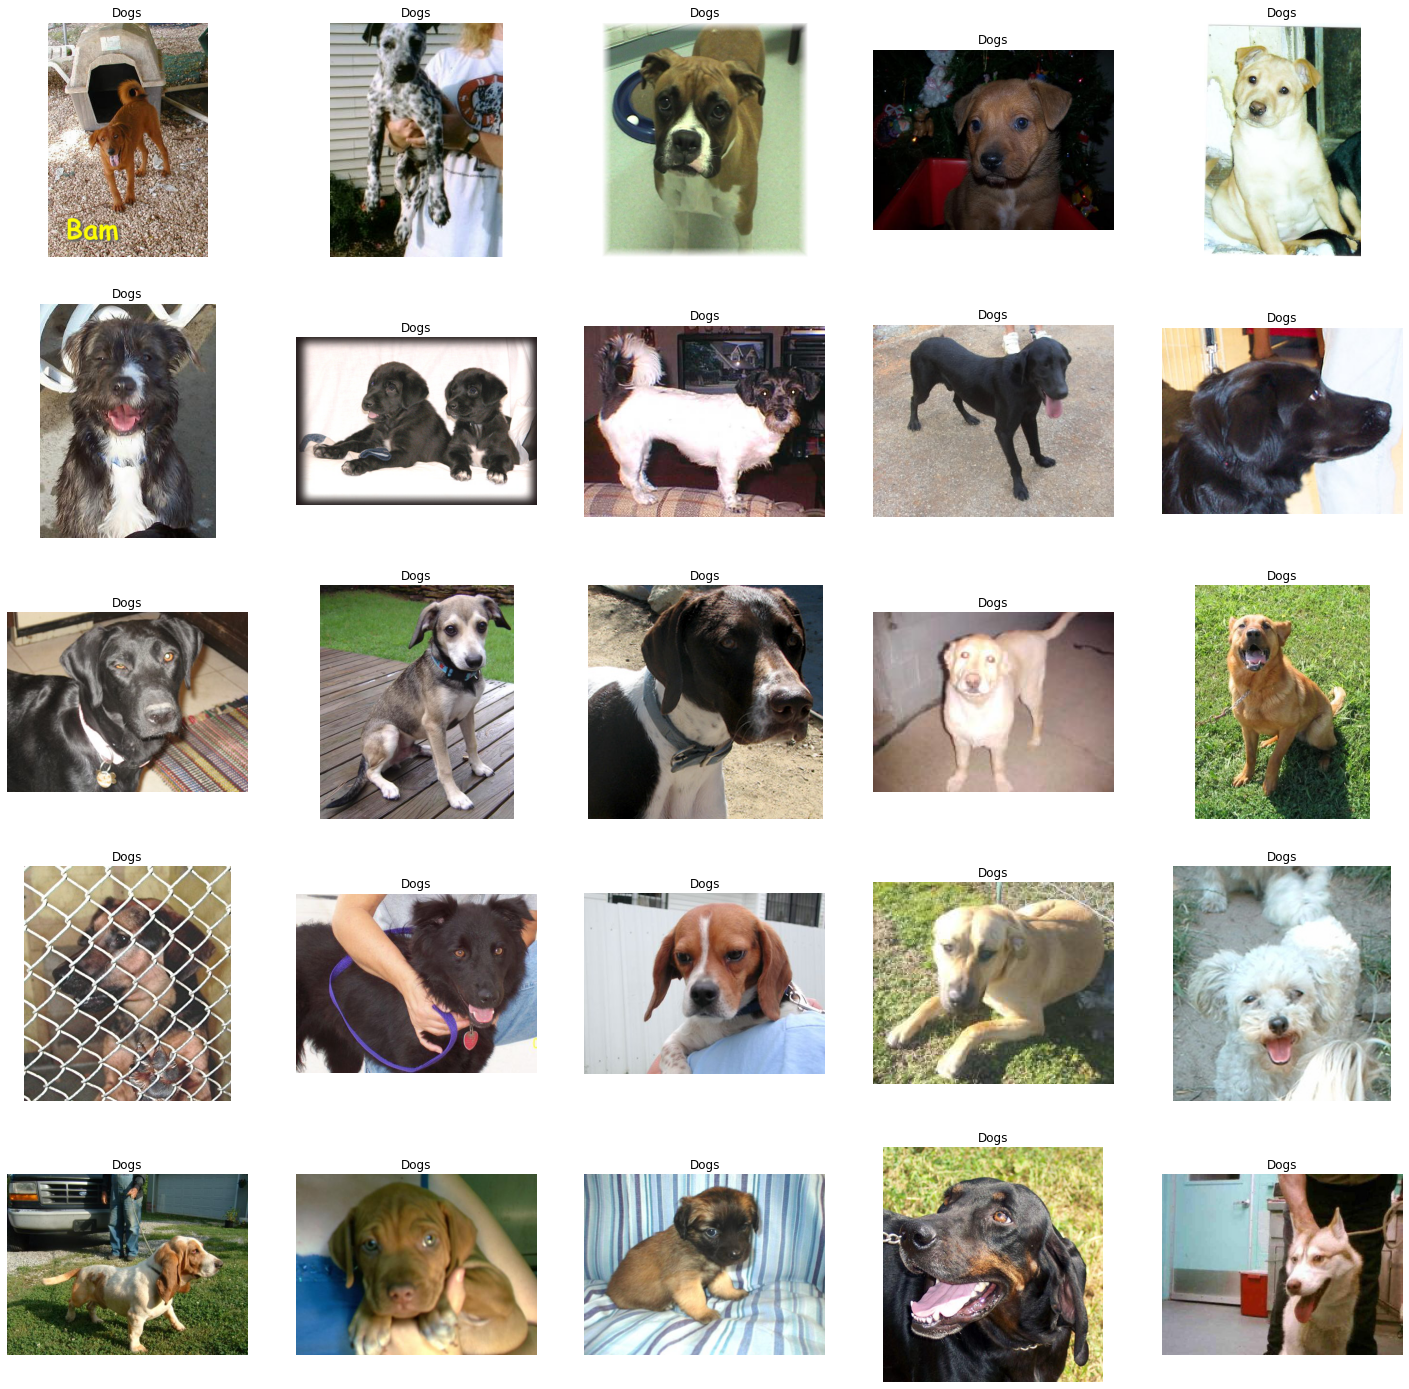

In [53]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

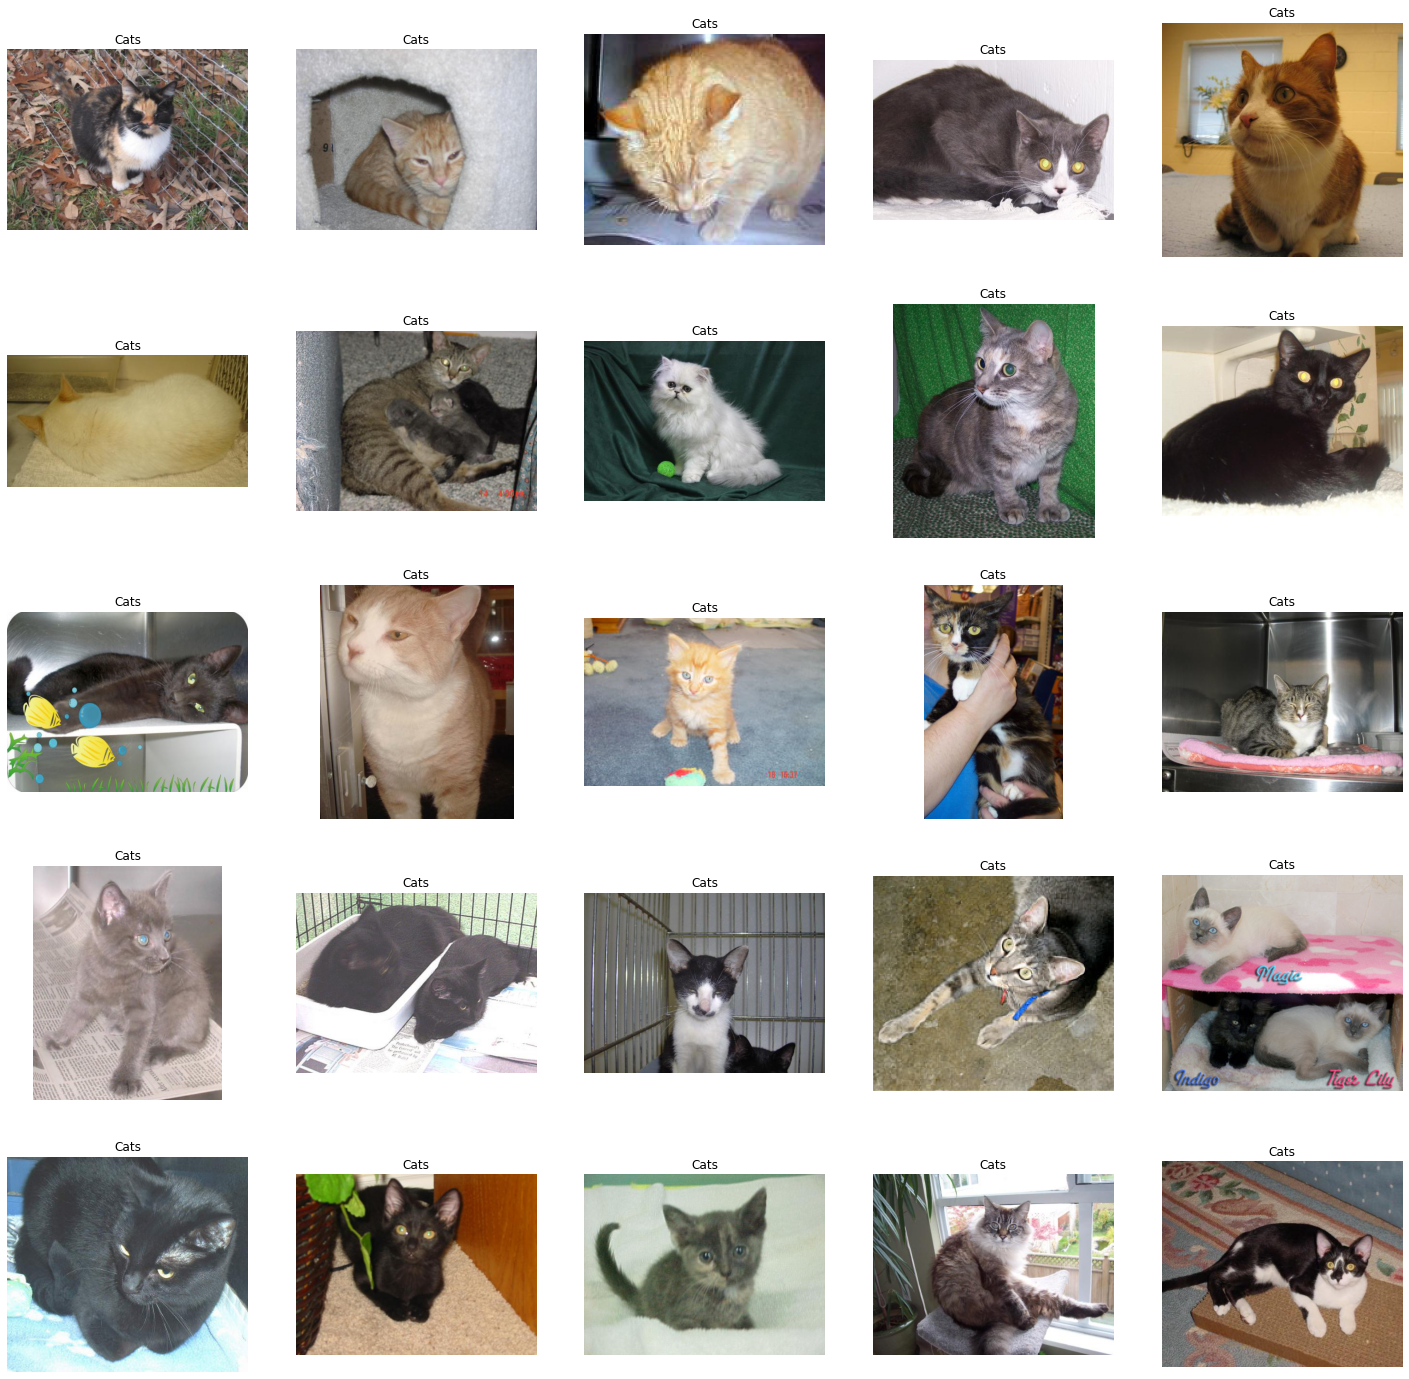

In [54]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

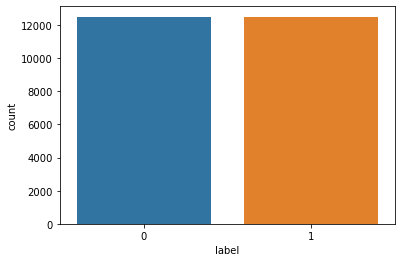

In [55]:
import seaborn as sns
sns.countplot(df['label'])

## Create DataGenerator for the Images

In [56]:
df['label'] = df['label'].astype('str')

In [57]:
df.head()

images label
0  /home/user/Documents/Desktop/PetImages/Dog/886...     1
1  /home/user/Documents/Desktop/PetImages/Cat/120...     0
2  /home/user/Documents/Desktop/PetImages/Dog/531...     1
3  /home/user/Documents/Desktop/PetImages/Dog/685...     1
4  /home/user/Documents/Desktop/PetImages/Dog/386...     1

In [58]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [60]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 168s 4s/step - loss: 0.7851 - accuracy: 0.5036 - val_loss: 0.6575 - val_accuracy: 0.5928
Epoch 2/10
40/40 [==============================] - 172s 4s/step - loss: 0.6479 - accuracy: 0.6181 - val_loss: 0.5864 - val_accuracy: 0.6906
Epoch 3/10
40/40 [==============================] - 171s 4s/step - loss: 0.5879 - accuracy: 0.6916 - val_loss: 0.5475 - val_accuracy: 0.7192
Epoch 4/10
40/40 [==============================] - 169s 4s/step - loss: 0.5557 - accuracy: 0.7130 - val_loss: 0.5585 - val_accuracy: 0.7100
Epoch 5/10
40/40 [==============================] - 169s 4s/step - loss: 0.5482 - accuracy: 0.7194 - val_loss: 0.4954 - val_accuracy: 0.7590
Epoch 6/10
40/40 [==============================] - 168s 4s/step - loss: 0.5059 - accuracy: 0.7545 - val_loss: 0.5286 - val_accuracy: 0.7348
Epoch 7/10
40/40 [==============================] - 170s 4s/step - loss: 0.5210 - accuracy: 0.7432 - val_loss: 0.5261 - val_accuracy: 0.7298
Epoch 8/10
40

## Result

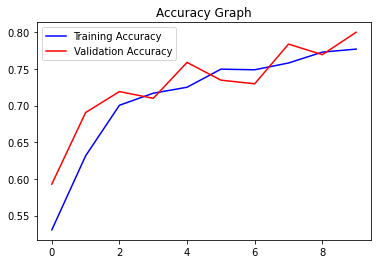

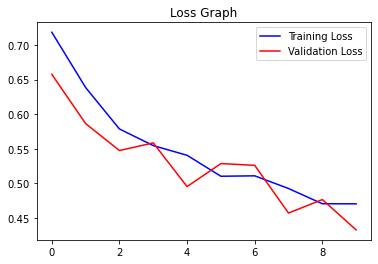

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [76]:
from matplotlib.image import imread

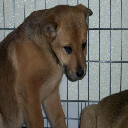

In [87]:
from keras.preprocessing import image
img="/home/user/Documents/Desktop/PetImages/Dog/4102.jpg"
user_imgae=image.load_img(img,target_size=(128,128,3))
user_imgae

In [88]:
user_image_array=image.img_to_array(user_imgae)
user_image_array=np.expand_dims(user_image_array,axis=0)
user_image_array.shape
result=model.predict(user_image_array)
print(int(result))

1


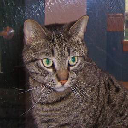

In [89]:
from keras.preprocessing import image
img="/home/user/Documents/Desktop/PetImages/Cat/1.jpg"
user_imgae=image.load_img(img,target_size=(128,128,3))
user_imgae

In [90]:
user_image_array=image.img_to_array(user_imgae)
user_image_array=np.expand_dims(user_image_array,axis=0)
user_image_array.shape
result=model.predict(user_image_array)
print(int(result))

0
